# Случайное блуждание с поглощением на концах отрезка

In [1]:
clc;
clear;
pkg load statistics;

In [2]:
N = 8;
p = 0.7;
q = 1 - p;
figure_number = 1;

In [3]:
P = diag(p * ones(N - 1, 1), 1) + diag(q * ones(N - 1, 1), -1);
P(1, 1) = P(N, N) = 1;
P(1, 2) = P(N, N-1) = 0

P =

   1.0000        0        0        0        0        0        0        0
   0.3000        0   0.7000        0        0        0        0        0
        0   0.3000        0   0.7000        0        0        0        0
        0        0   0.3000        0   0.7000        0        0        0
        0        0        0   0.3000        0   0.7000        0        0
        0        0        0        0   0.3000        0   0.7000        0
        0        0        0        0        0   0.3000        0   0.7000
        0        0        0        0        0        0        0   1.0000



In [4]:
p0 = rand(1, N - 4);
p1 = [0, 0, p0 / sum(p0), 0, 0];

In [5]:
x = zeros(1, N);
x(1) = p1(1);
for i = 2 : N
    x(i) = x(i - 1) + p1(i);
end
x

x =

        0        0   0.0016   0.4281   0.5185   1.0000   1.0000   1.0000



In [6]:
u = rand();
start = 1;

while (u > x(start))
    start++;
end
start

start = 6


In [7]:
if (p != q)
    px0 = ((q / p) ^ (start - 1) - (q / p) ^ (N - 1)) / (1 - (q / p) ^ (N - 1));
else
    px0 = 1 - (start - 1) / (N - 1);
end

In [8]:
printf('Theoretical marginal probabilities: %d %d', px0, 1 - px0)

Theoretical marginal probabilities: 0.0118341 0.988166

In [9]:
x0 = zeros(1, N);
x0(start) = 1;
px1 = x0 * (P ^ 200);

In [10]:
printf('Practical marginal probabilities: %d %d', px1(1), px1(N));

Practical marginal probabilities: 0.0118341 0.988166

In [11]:
j = 1;
for k = 1 : 201
  Pn = x0 * P ^ k;
  Pn1(j, :) = Pn;
  ++j;
end

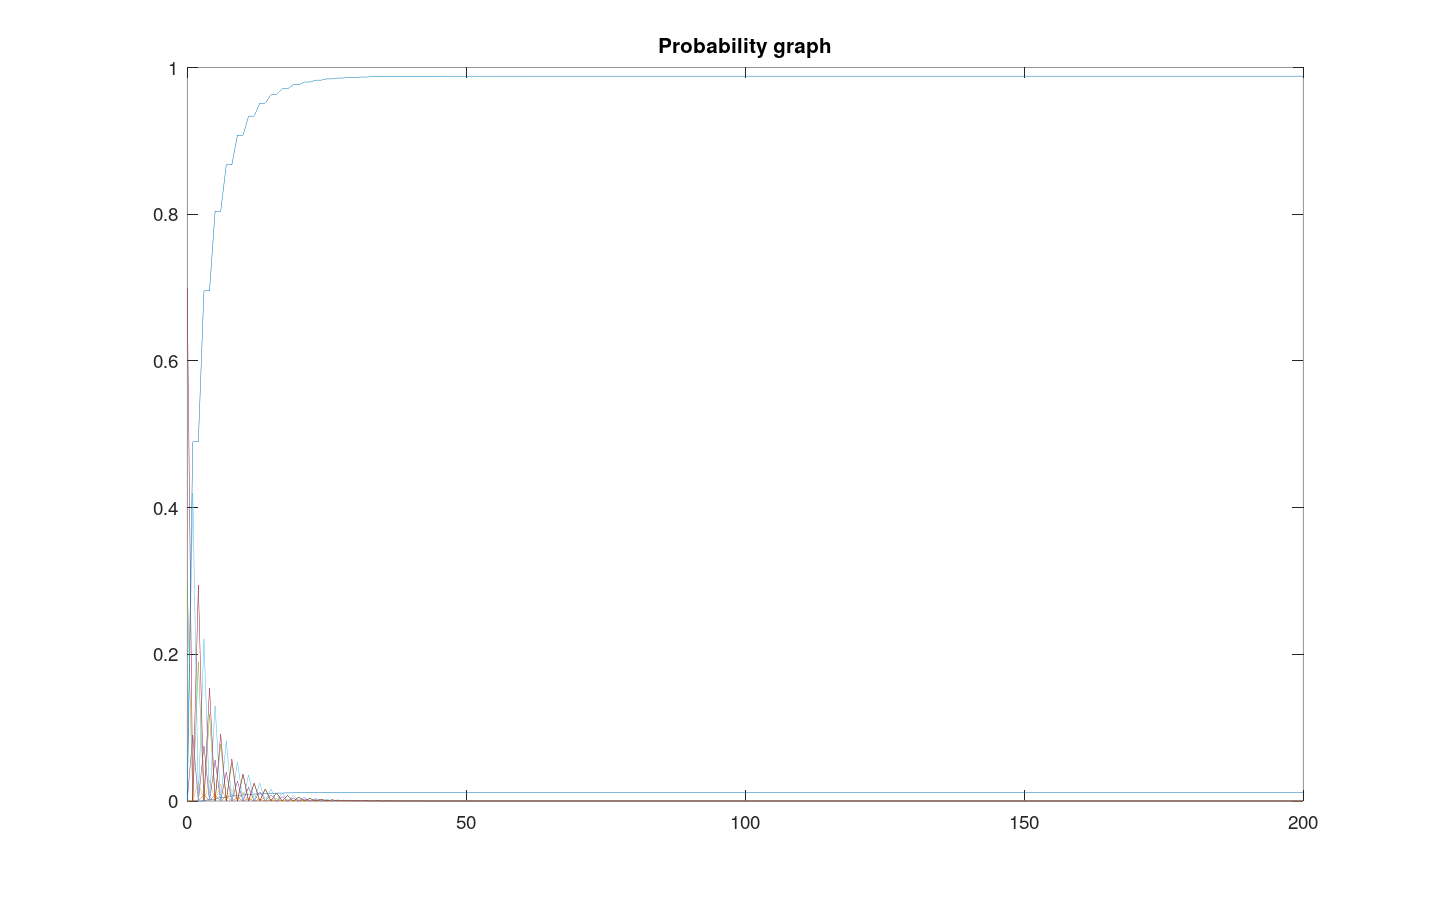

In [12]:
f = figure(figure_number++, "position", get(0, "screensize"));
plot(0 : 200, Pn1)
title('Probability graph')
pause(0.01)

In [13]:
s(1) = start;
for k = 2 : 100
    u = rand();
    s(k) = s(k - 1);
    if (u < q)
        s(k)--;
    elseif (s(k - 1) != 1 && s(k - 1) != N)
        s(k)++;
    end
end

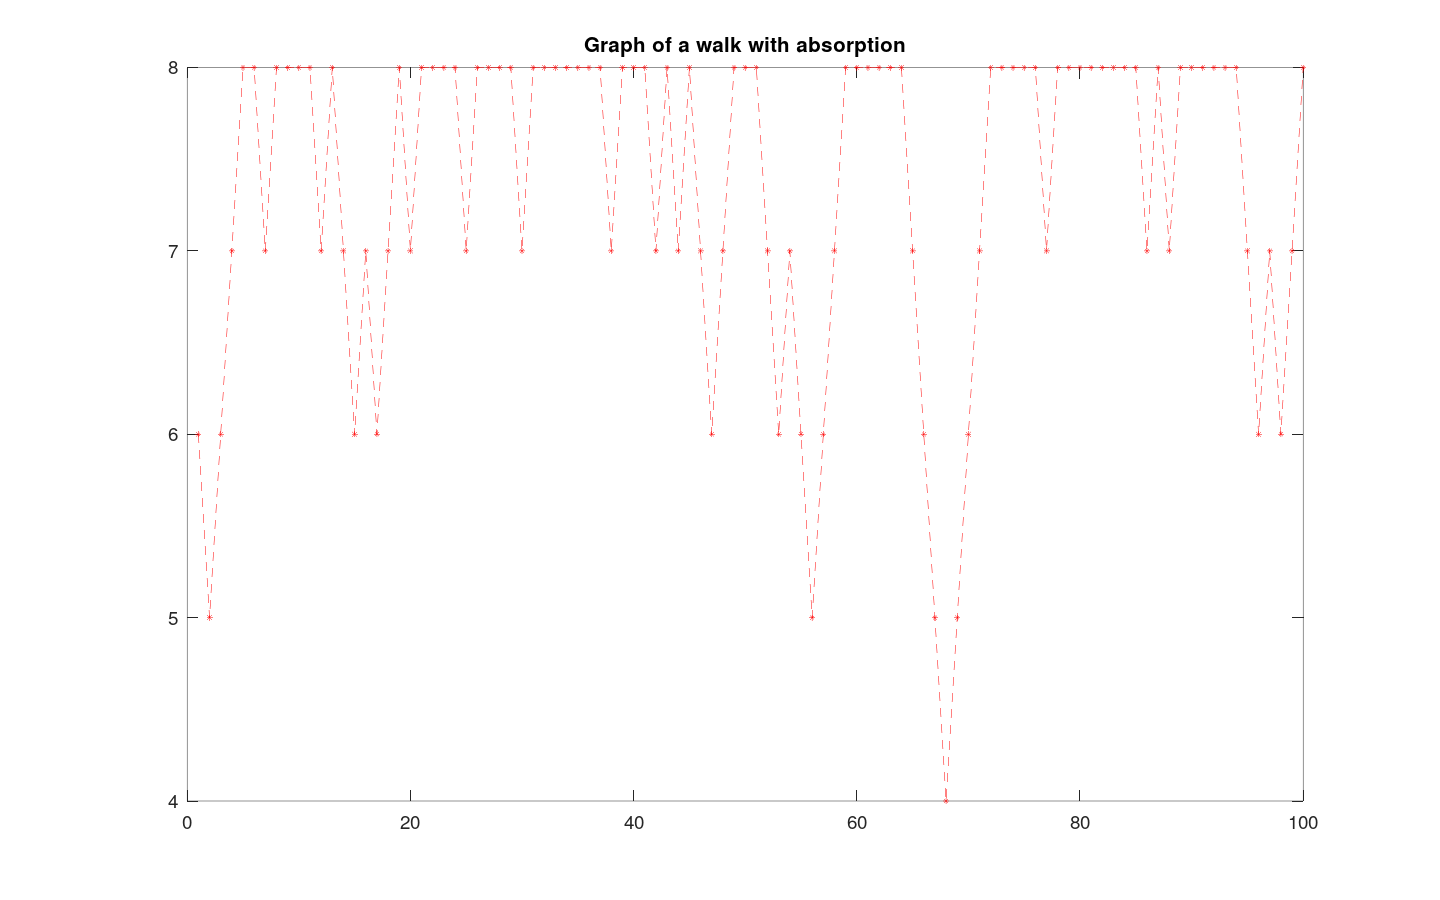

In [14]:
f = figure(figure_number++, "position", get(0, "screensize"));
plot(s, 'r--*');
title('Graph of a walk with absorption')

### Вывод:
Практические и теоретические предельные вероятности совпали.